In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Notebook for Wheat Price
* Dhruv Pandit 2022

In [2]:
df_wheat = pd.read_excel(r'/Users/dhruvpandit/Documents/GitHub/time-series-project/Datasets/PWHEAMTUSDM.xls').set_index('observation_date').rename(columns={'PWHEAMTUSDM' : 'Wheat_Price'})
df_wheat

,Wheat_Price
observation_date,
1990-01-01,167.918579
1990-02-01,160.937271
1990-03-01,156.528030
1990-04-01,159.467529
1990-05-01,149.179291
...,...
2022-05-01,444.156568
2022-06-01,397.652320
2022-07-01,321.975128


In [ ]:
df_wheat_train = 

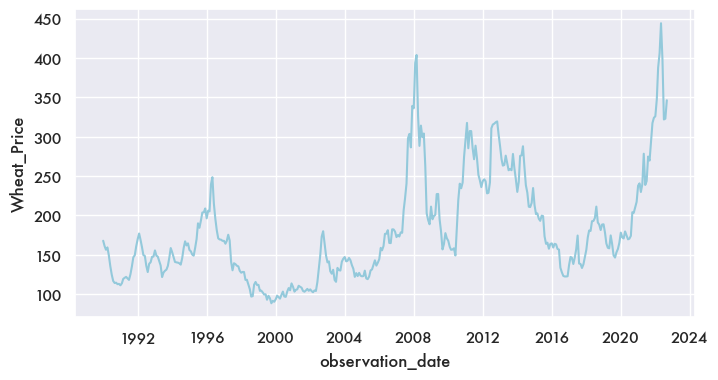

In [15]:
sns.set(rc={'figure.facecolor':'white', 'figure.figsize':(8,4)})
#sns.set_palette("ocean_r") #rocket, gist_heat_r, ocean_r, viridis_r
#splot = sns.lineplot(data=df, ci=None, x='Months', y='Mean Dist', hue='Routing Strat',style='Routing Strat', markers=['v','p', 'o', 's']) #

sns.set_theme(style='darkgrid', font = 'Futura', palette='ocean_r')
splot = sns.lineplot(data = df_wheat, x = 'observation_date', y = 'Wheat_Price')


## Stationarity Tests
The p-value determines the result of the test. If it is smaller than a critical threshold of 0.05 or 0.01, we reject the null hypothesis and conclude that the series is stationary. Otherwise, we fail to reject the null and conclude the series is non-stationary.

In [7]:
from statsmodels.tsa.stattools import adfuller

def checkStationarity(series, critical_value):
    test_results = adfuller(series)
    if test_results[1] > critical_value:
        print('Series is Non Stationary')
    else:
        print('Series is Stationary')

    print(f"ADF test statistic: {test_results[0]}")
    print(f"p-value: {test_results[1]}")
    print("Critical thresholds:")   
    for key, value in test_results[4].items():
        print(f"\t{key}: {value}")

checkStationarity(df_wheat['Wheat_Price'], 0.05)

Series is Non Stationary
ADF test statistic: -1.9390487502096074
p-value: 0.3139200858695269
Critical thresholds:
	1%: -3.4474946672686824
	5%: -2.8690962436986855
	10%: -2.570795299750434


In [12]:
transformed_df = pd.Series(np.log(df_wheat["Wheat_Price"])).diff().dropna()

checkStationarity(transformed_df, 0.05)

Series is Stationary
ADF test statistic: -15.727063808321123
p-value: 1.3029254061006328e-28
Critical thresholds:
	1%: -3.4471856790801514
	5%: -2.868960436182993
	10%: -2.5707229006220524


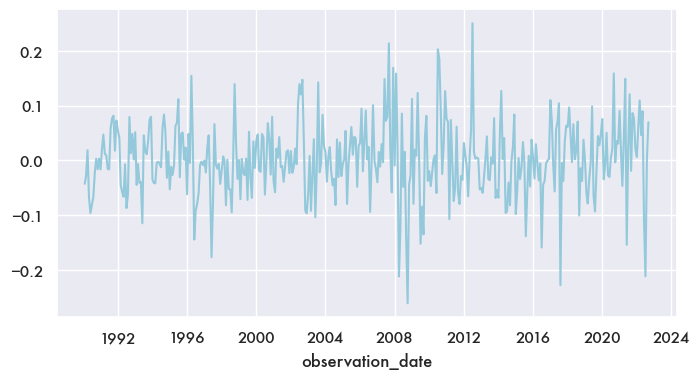

In [13]:
sns.set(rc={'figure.facecolor':'white', 'figure.figsize':(8,4)})
#sns.set_palette("ocean_r") #rocket, gist_heat_r, ocean_r, viridis_r
#splot = sns.lineplot(data=df, ci=None, x='Months', y='Mean Dist', hue='Routing Strat',style='Routing Strat', markers=['v','p', 'o', 's']) #

sns.set_theme(style='darkgrid', font = 'Futura', palette='ocean_r')
splot = sns.lineplot(data = transformed_df, x = transformed_df.index, y = transformed_df.values)

/opt/homebrew/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


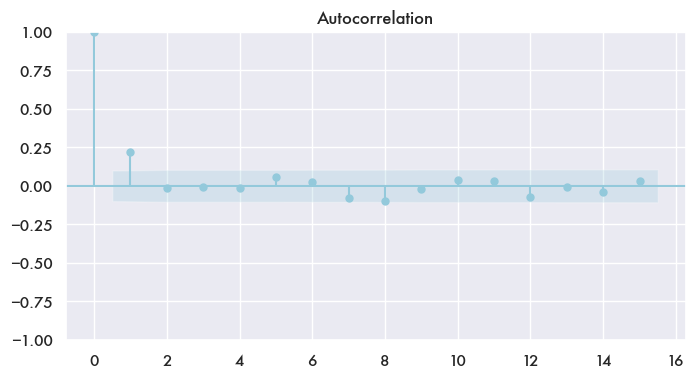

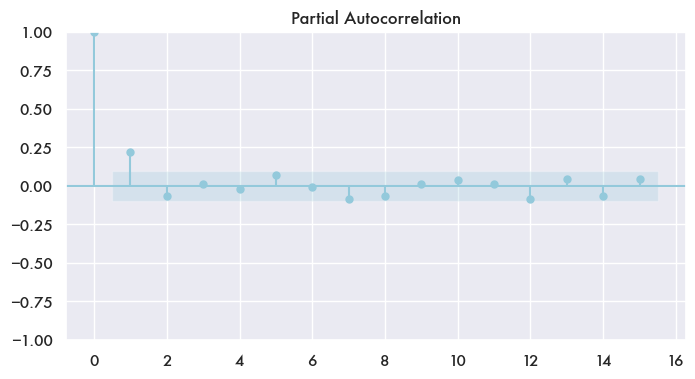

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

acf = plot_acf(transformed_df, lags = 15)

pacf = plot_pacf(transformed_df, lags = 15)


ACF at Lag 1, PACF at lag 1
AR(1), and MA(1) maybe?

Lets build a model using ARIMA. 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
def sarima_generate(param, d, D, s, exog):
    results_df = pd.DataFrame()
    for each in param:
        model = SARIMAX(endog=exog, order=(each[0], d, each[1]), seasonal_order=(each[2], D, each[3], s)).fit(dis = -1)
        aic = model.aic
        results_df = pd.concat([results_df, pd.DataFrame({'Model' : str(each), "AIC": aic}, index= each)])
    return results_df

In [67]:
from itertools import product
p = range(0, 3, 1)
d = 1
q = range(0, 3, 1)
P = range(0, 3, 1)
D = 1
Q = range(0, 3, 1)
s = 12
parameters = product(p, q, P, Q)
parameters_list = list(parameters)

In [91]:
wheat_model = sarima_generate(parameters_list, d, D, s, transformed_df)

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inf

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -6.31312D-01    |proj g|=  2.67013D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4     13      1     0     0   1.220D-04  -6.316D-01
  F = -0.63159039559797236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.9


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     36      1     0     0   1.229D-02  -9.628D-01
  F = -0.96281566341728186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.91478D-01    |proj g|=  3.51147D+00

At iterate    5    f= -9.52005D-01    |proj g|=  7.88626D-02

At iterate   10    f= -9.55106D-01    |proj g|=  5.54677D-01

At iterate   15    f= -9.56096D-01    |proj g|=  8.79582D-02

At iterate   20    f= -9.62395D-01    |proj g|=  4.91167D-01

At iterate   25    f= -9.68359D-01    |proj g|=  7.29139D-02

At iterate   30    f= -9.69109D-01    |proj g|=  7.13888D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.78898D-01    |proj g|=  2.46923D-01

At iterate    5    f= -7.79135D-01    |proj g|=  8.43464D-02

At iterate   10    f= -7.79235D-01    |proj g|=  1.01394D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     16      1     0     0   8.769D-04  -7.792D-01
  F = -0.77923504514992381     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f= -8.71631D-01    |proj g|=  3.73869D-01

At iterate   10    f= -9.27363D-01    |proj g|=  2.53043D+00

At iterate   15    f= -9.41475D-01    |proj g|=  3.82866D-01

At iterate   20    f= -9.62421D-01    |proj g|=  9.71546D-01

At iterate   25    f= -9.67702D-01    |proj g|=  3.51223D-02

At iterate   30    f= -9.68055D-01    |proj g|=  6.49146D-04

At iterate   35    f= -9.68094D-01    |proj g|=  6.41653D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     35     56      1     0     0   6.417D-02  -9.681D-01
  F = -0.96809363867118270     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.23287D-01    |proj g|=  2.85474D+00


 This problem is unconstrained.



At iterate    5    f= -9.53378D-01    |proj g|=  2.24736D-02

At iterate   10    f= -9.54098D-01    |proj g|=  5.31988D-01

At iterate   15    f= -9.60225D-01    |proj g|=  5.30234D-02

At iterate   20    f= -9.61871D-01    |proj g|=  2.39087D-01

At iterate   25    f= -9.64786D-01    |proj g|=  2.37224D-01

At iterate   30    f= -9.65606D-01    |proj g|=  1.94789D-01

At iterate   35    f= -9.66358D-01    |proj g|=  3.39156D-03

At iterate   40    f= -9.66509D-01    |proj g|=  5.78044D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     63      1     0     0   5.750D-03  -9.665D-01
  F = -0.96650900742890999     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.58504D-01    |proj g|=  4.14787D-01

At iterate    5    f= -8.59060D-01    |proj g|=  1.27078D-01

At iterate   10    f= -8.59208D-01    |proj g|=  1.53442D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     19      1     0     0   3.790D-04  -8.592D-01
  F = -0.85920967865109688     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.70189D-01    |proj g|=  7.52465D-01

At iterate    5    f= -8.72596D-01    |proj g|=  4.44958D-01

At iterate   10    f= -8.81850D-01    |proj g|=  2.93322D-01

At iterate   15    f= -9.13021D-01    |proj g|=  2.29365D+00

At iterate   20    f= -9.55058D-01    |proj g|=  1.01074D-01

At iterate   25    f= -9.70681D-01    |proj g|=  4.39624D-02

At iterate   30    f= -9.72075D-01    |proj g|=  1.92257D-02

At iterate   35    f= -9.72239D-01    |proj g|=  1.20177D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -9.72257D-01    |proj g|=  4.72028D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     43     77      2     0     0   5.786D-04  -9.723D-01
  F = -0.97225729183392617     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.11084D-01    |proj g|=  1.85193D+00

At iterate    5    f= -9.22281D-01    |proj g|=  2.53647D-01

At iterate   10    f= -9.46594D-01    |proj g|=  1.55794D+00

At iterate   15    f= -9.52437D-01    |proj g|=  4.48286D-01

At iterate   20    f= -9.68779D-01    |proj g|=  8.43645D-01

At iterate   25    f= -9.73021D-01    |proj g|=  2.16862D-02

At iterate   30    f= -9.73675D-01    |proj g|=  7.37967D-02

At iterate   35    f= -9.74987D-01    |proj g|=  5.16867D-03

At iterate   40    f= -9.75147D-01    |proj g|=  9.80229D-02

At iterate   45    f= -9.75311D-01    |proj g|=  1.43062D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.89685D-01    |proj g|=  3.67205D-01

At iterate    5    f= -8.11304D-01    |proj g|=  1.49892D+00

At iterate   10    f= -8.49309D-01    |proj g|=  2.40847D-01

At iterate   15    f= -8.57067D-01    |proj g|=  7.26253D-04

At iterate   20    f= -8.57776D-01    |proj g|=  1.87683D-03

At iterate   25    f= -8.57827D-01    |proj g|=  5.78248D-04

At iterate   30    f= -8.57829D-01    |proj g|=  2.04670D-04

At iterate   35    f= -8.57830D-01    |proj g|=  6.31262D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f= -1.08193D+00    |proj g|=  1.80089D-01

At iterate   10    f= -1.11245D+00    |proj g|=  2.28013D+00

At iterate   15    f= -1.15954D+00    |proj g|=  6.54062D-02

At iterate   20    f= -1.16281D+00    |proj g|=  1.34969D-01

At iterate   25    f= -1.16309D+00    |proj g|=  1.46396D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     39      1     0     0   1.274D-02  -1.163D+00
  F =  -1.1631215619963209     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.94804D-01    |proj g|=  4.60242D+00

At iterate    5    f= -1.09858D+00    |proj g|=  1.04126D-01

At iterate   10    f= -1.12165D+00    |proj g|=  7.06797D-01

At iterate   15    f= -1.15053D+00    |proj g|=  4.63219D-01

At iterate   20    f= -1.16253D+00    |proj g|=  8.40143D-02

At iterate   25    f= -1.16469D+00    |proj g|=  5.45652D-02

At iterate   30    f= -1.16515D+00    |proj g|=  1.23527D-02

At iterate   35    f= -1.16515D+00    |proj g|=  1.54842D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     39     66      1     0     0   1.192D-02  -1.165D+00
  F =  -1.1651526276879822     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.13612D-01    |proj g|=  2.73211D+00

At iterate    5    f= -9.43084D-01    |proj g|=  1.11682D-01

At iterate   10    f= -9.69054D-01    |proj g|=  1.60269D+00

At iterate   15    f= -9.96833D-01    |proj g|=  1.91762D-02

At iterate   20    f= -1.00353D+00    |proj g|=  9.95550D-02

At iterate   25    f= -1.00402D+00    |proj g|=  2.03152D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     37      1     0     0   

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f= -1.03015D+00    |proj g|=  5.71640D-01

At iterate   10    f= -1.12179D+00    |proj g|=  2.47367D+00

At iterate   15    f= -1.13643D+00    |proj g|=  3.41954D-01

At iterate   20    f= -1.15925D+00    |proj g|=  8.02398D-01

At iterate   25    f= -1.16468D+00    |proj g|=  4.60640D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -1.16499D+00    |proj g|=  8.61015D-02

At iterate   35    f= -1.16505D+00    |proj g|=  3.14774D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     65      2     0     0   3.148D-05  -1.165D+00
  F =  -1.1650549701521979     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.94945D-01    |proj g|=  4.62517D+00


 This problem is unconstrained.



At iterate    5    f= -1.09972D+00    |proj g|=  1.04946D-01

At iterate   10    f= -1.11202D+00    |proj g|=  1.92748D+00

At iterate   15    f= -1.15206D+00    |proj g|=  4.61585D-01

At iterate   20    f= -1.16226D+00    |proj g|=  5.93080D-02

At iterate   25    f= -1.16421D+00    |proj g|=  1.67949D-01

At iterate   30    f= -1.16546D+00    |proj g|=  8.57102D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     51      1     0     0   1.442D-03  -1.166D+00
  F =  -1.1656030686057395     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.56944D-01    |proj g|=  3.62903D+00

At iterate    5    f= -1.01467D+00    |proj g|=  3.21985D-01

At iterate   10    f= -1.04329D+00    |proj g|=  1.44667D+00

At iterate   15    f= -1.04937D+00    |proj g|=  4.71483D-01

At iterate   20    f= -1.06758D+00    |proj g|=  3.61615D-01

At iterate   25    f= -1.07502D+00    |proj g|=  4.48198D-02

At iterate   30    f= -1.07734D+00    |proj g|=  1.63410D-02

At iterate   35    f= -1.07741D+00    |proj g|=  6.25770D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -1.07742D+00    |proj g|=  3.33371D-03

At iterate   45    f= -1.07742D+00    |proj g|=  1.31051D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     95      2     0     0   5.951D-04  -1.077D+00
  F =  -1.0774217602546816     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.62532D-01    |proj g|=  3.76062D+00

At iterate    5    f= -1.02551D+00    |proj g|=  3.08254D-01

At iterate   10    f= -1.05922D+00    |proj g|=  1.66366D+00

At iterate   15    f= -1.07173D+00    |proj g|=  1.15211D+00

At iterate   20    f= -1.13595D+00    |proj g|=  1.47886D+00

At iterate   25    f= -1.16150D+00    |proj g|=  8.62842D-01

At iterate   30    f= -1.16520D+00    |proj g|=  5.45426D-02

At iterate   35    f= -1.16548D+00    |proj g|=  3.71225D-03

At iterate   40    f= -1.16548D+00    |proj g|=  1.21793D-03

At iterate   45    f= -1.16549D+00    |proj g|=  3.90340D-03


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.16549D+00    |proj g|=  1.12418D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     70      1     0     0   1.124D-03  -1.165D+00
  F =  -1.1654893268826492     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.83528D-01    |proj g|=  4.25750D+00


 This problem is unconstrained.



At iterate    5    f= -1.07109D+00    |proj g|=  8.51419D-01

At iterate   10    f= -1.11693D+00    |proj g|=  1.32152D-01

At iterate   15    f= -1.12649D+00    |proj g|=  1.78026D+00

At iterate   20    f= -1.16025D+00    |proj g|=  3.56869D-01

At iterate   25    f= -1.16917D+00    |proj g|=  1.76887D-02

At iterate   30    f= -1.16941D+00    |proj g|=  6.75323D-04

At iterate   35    f= -1.16941D+00    |proj g|=  1.07153D-02

At iterate   40    f= -1.16941D+00    |proj g|=  3.65847D-03

At iterate   45    f= -1.16941D+00    |proj g|=  7.55602D-03


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.16942D+00    |proj g|=  1.27531D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   1.275D-02  -1.169D+00
  F =  -1.1694238844158698     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.43055D-01    |proj g|=  6.24257D-01

At iterate    5    f= -8.44461D-01    |proj g|=  2.26946D-01

At iterate   10    f= -8.46673D-01    |proj g|=  5.99221D-02

At iterate   15    f= -8.49366D-01    |proj g|=  7.67784D-01

At iterate   20    f= -8.72563D-01    |proj g|=  1.27253D-01

At iterate   25    f= -8.75928D-01    |proj g|=  1.16858D-02

At iterate   30    f= -8.76364D-01    |proj g|=  3.85796D-02

At iterate   35    f= -8.76466D-01    |proj g|=  1.52282D-02

At iterate   40    f= -8.76474D-01    |proj g|=  9.66428D-04

At iterate   45    f= -8.76477D-01    |proj g|=  2.62926D-03

At iterate   50    f= -8.76478D-01    |proj g|=  9.68528D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. Af


At iterate    5    f= -1.14088D+00    |proj g|=  2.93578D-01

At iterate   10    f= -1.15151D+00    |proj g|=  4.55179D-01

At iterate   15    f= -1.18249D+00    |proj g|=  1.74315D-01

At iterate   20    f= -1.18925D+00    |proj g|=  2.37513D-01

At iterate   25    f= -1.18989D+00    |proj g|=  3.42374D-02

At iterate   30    f= -1.19007D+00    |proj g|=  3.00000D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     51      1     0     0   9.458D-03  -1.190D+00
  F =  -1.1900709590965195     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04445D+00    |proj g|=  4.98385D+00

At iterate    5    f= -1.15893D+00    |proj g|=  5.12110D-01

At iterate   10    f= -1.16524D+00    |proj g|=  2.79800D-02

At iterate   15    f= -1.16552D+00    |proj g|=  3.18227D-01

At iterate   20    f= -1.17756D+00    |proj g|=  8.57753D-01

At iterate   25    f= -1.18287D+00    |proj g|=  4.34034D-01

At iterate   30    f= -1.19155D+00    |proj g|=  3.05150D-01

At iterate   35    f= -1.19345D+00    |proj g|=  1.12127D-01

At iterate   40    f= -1.19362D+00    |proj g|=  5.11700D-02

At iterate   45    f= -1.19368D+00    |proj g|=  1.23688D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.61942D-01    |proj g|=  3.00150D+00

At iterate    5    f= -9.94751D-01    |proj g|=  1.00760D-01

At iterate   10    f= -9.99046D-01    |proj g|=  5.05450D-01

At iterate   15    f= -1.00790D+00    |proj g|=  8.78386D-01

At iterate   20    f= -1.01617D+00    |proj g|=  6.79829D-01

At iterate   25    f= -1.02179D+00    |proj g|=  2.15771D-01

At iterate   30    f= -1.02216D+00    |proj g|=  1.86474D-02

At iterate   35    f= -1.02216D+00    |proj g|=  1.61462D-03

At iterate   40    f= -1.02216D+00    |proj g|=  2.41420D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01487D+00    |proj g|=  4.12168D+00

At iterate    5    f= -1.08809D+00    |proj g|=  6.59991D-01

At iterate   10    f= -1.14972D+00    |proj g|=  5.93035D-01

At iterate   15    f= -1.18109D+00    |proj g|=  2.30260D-01

At iterate   20    f= -1.19187D+00    |proj g|=  6.92382D-02

At iterate   25    f= -1.19310D+00    |proj g|=  1.51831D-02

At iterate   30    f= -1.19325D+00    |proj g|=  1.53188D-02

At iterate   35    f= -1.19326D+00    |proj g|=  5.68103D-03

At iterate   40    f= -1.19326D+00    |proj g|=  7.82796D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04457D+00    |proj g|=  5.00732D+00


 This problem is unconstrained.



At iterate    5    f= -1.15981D+00    |proj g|=  2.61727D-01

At iterate   10    f= -1.16356D+00    |proj g|=  9.59973D-02

At iterate   15    f= -1.16415D+00    |proj g|=  5.16022D-01

At iterate   20    f= -1.18297D+00    |proj g|=  7.75278D-01

At iterate   25    f= -1.19181D+00    |proj g|=  2.12346D-01

At iterate   30    f= -1.19252D+00    |proj g|=  1.03400D-02

At iterate   35    f= -1.19253D+00    |proj g|=  2.33375D-02

At iterate   40    f= -1.19270D+00    |proj g|=  5.71542D-02

At iterate   45    f= -1.19292D+00    |proj g|=  2.09966D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19308D+00    |proj g|=  3.20591D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   3.206D-02  -1.193D+00
  F =  -1.1930836784045713     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00758D+00    |proj g|=  3.98430D+00

At iterate    5    f= -1.07190D+00    |proj g|=  1.54413D-01

At iterate   10    f= -1.07402D+00    |proj g|=  5.69480D-02

At iterate   15    f= -1.07570D+00    |proj g|=  6.68878D-01

At iterate   20    f= -1.08329D+00    |proj g|=  5.09944D-02

At iterate   25    f= -1.09008D+00    |proj g|=  6.77633D-01

At iterate   30    f= -1.09566D+00    |proj g|=  2.51331D-01

At iterate   35    f= -1.09803D+00    |proj g|=  6.64320D-02

At iterate   40    f= -1.09807D+00    |proj g|=  2.38976D-02

At iterate   45    f= -1.09813D+00    |proj g|=  7.54129D-03


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.09813D+00    |proj g|=  7.45653D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63      1     0     0   7.457D-04  -1.098D+00
  F =  -1.0981330422692450     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01361D+00    |proj g|=  4.13098D+00

At iterate    5    f= -1.08392D+00    |proj g|=  6.29244D-02

At iterate   10    f= -1.09076D+00    |proj g|=  1.21808D+00

At iterate   15    f= -1.10987D+00    |proj g|=  1.94143D+00

At iterate   20    f= -1.18094D+00    |proj g|=  1.96379D-01

At iterate   25    f= -1.18803D+00    |proj g|=  3.95876D-01

At iterate   30    f= -1.19109D+00    |proj g|=  1.28573D-01

At iterate   35    f= -1.19435D+00    |proj g|=  9.33976D-02

At iterate   40    f= -1.19492D+00    |proj g|=  1.73147D-01

At iterate   45    f= -1.19497D+00    |proj g|=  6.23910D-03


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19497D+00    |proj g|=  5.57721D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68      1     0     0   5.577D-03  -1.195D+00
  F =  -1.1949664490835665     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03562D+00    |proj g|=  4.67047D+00


 This problem is unconstrained.



At iterate    5    f= -1.13255D+00    |proj g|=  5.31672D-01

At iterate   10    f= -1.15465D+00    |proj g|=  4.77914D-01

At iterate   15    f= -1.15674D+00    |proj g|=  9.06950D-01

At iterate   20    f= -1.18234D+00    |proj g|=  4.73789D-01

At iterate   25    f= -1.19022D+00    |proj g|=  4.93562D-02

At iterate   30    f= -1.19699D+00    |proj g|=  5.29136D-03

At iterate   35    f= -1.19701D+00    |proj g|=  3.07171D-03

At iterate   40    f= -1.19773D+00    |proj g|=  2.20038D-01

At iterate   45    f= -1.19875D+00    |proj g|=  9.67635D-03


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19899D+00    |proj g|=  1.30748D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     0     0   1.307D-02  -1.199D+00
  F =  -1.1989914441672083     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inf

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.05922D-01    |proj g|=  2.26335D-02

At iterate    5    f= -7.05924D-01    |proj g|=  7.00257D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     16      1     0     0   6.229D-04  -7.059D-01
  F = -0.70592433203904070     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.21315D-01    |proj g|=  4.15682D+00


 This problem is unconstrained.



At iterate    5    f= -1.01892D+00    |proj g|=  1.42284D-02

At iterate   10    f= -1.01977D+00    |proj g|=  7.72482D-02

At iterate   15    f= -1.02040D+00    |proj g|=  4.50299D-01

At iterate   20    f= -1.02657D+00    |proj g|=  2.40202D-01

At iterate   25    f= -1.02818D+00    |proj g|=  5.38220D-02

At iterate   30    f= -1.02837D+00    |proj g|=  2.50842D-02

At iterate   35    f= -1.02838D+00    |proj g|=  9.25069D-03

At iterate   40    f= -1.02838D+00    |proj g|=  2.83223D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     53      1     0     0   1.581D-04  -1.028D+00
  F =  -1.02838218101

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.36754D-01    |proj g|=  2.35104D+00

At iterate    5    f= -8.60999D-01    |proj g|=  1.84342D-02

At iterate   10    f= -8.61064D-01    |proj g|=  4.39604D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     22      1     0     0   8.756D-05  -8.611D-01
  F = -0.86106408639326548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f= -9.46866D-01    |proj g|=  5.15556D-01

At iterate   10    f= -9.99763D-01    |proj g|=  1.67258D+00

At iterate   15    f= -1.00681D+00    |proj g|=  5.90773D-01

At iterate   20    f= -1.02594D+00    |proj g|=  9.98632D-02

At iterate   25    f= -1.02773D+00    |proj g|=  8.53572D-02

At iterate   30    f= -1.02814D+00    |proj g|=  2.92351D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     47      1     0     0   2.920D-03  -1.028D+00
  F =  -1.0281360012205700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.21593D-01    |proj g|=  4.18043D+00


 This problem is unconstrained.



At iterate    5    f= -1.01817D+00    |proj g|=  3.57860D-01

At iterate   10    f= -1.01875D+00    |proj g|=  1.28017D-01

At iterate   15    f= -1.02138D+00    |proj g|=  5.61810D-01

At iterate   20    f= -1.02250D+00    |proj g|=  1.36489D-01

At iterate   25    f= -1.02398D+00    |proj g|=  2.44004D-01

At iterate   30    f= -1.02484D+00    |proj g|=  2.93999D-02

At iterate   35    f= -1.02598D+00    |proj g|=  7.83884D-02

At iterate   40    f= -1.02748D+00    |proj g|=  5.83506D-02

At iterate   45    f= -1.02768D+00    |proj g|=  6.13169D-03


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.02770D+00    |proj g|=  9.47184D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64      1     0     0   9.472D-03  -1.028D+00
  F =  -1.0277005071250671     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.82278D-01    |proj g|=  3.22687D+00

At iterate    5    f= -9.32586D-01    |proj g|=  3.03601D-02

At iterate   10    f= -9.33339D-01    |proj g|=  9.08828D-02

At iterate   15    f= -9.33365D-01    |proj g|=  5.60912D-03

At iterate   20    f= -9.33365D-01    |proj g|=  3.24069D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     33      1     0     0   3.062D-04  -9.334D-01
  F = -0.93336525846303375     

CONVERG

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f= -9.43524D-01    |proj g|=  2.31937D-01

At iterate   10    f= -9.50934D-01    |proj g|=  1.04865D-01

At iterate   15    f= -9.79822D-01    |proj g|=  1.97679D+00

At iterate   20    f= -1.01307D+00    |proj g|=  1.65615D-01

At iterate   25    f= -1.02822D+00    |proj g|=  2.49824D-02

At iterate   30    f= -1.02860D+00    |proj g|=  1.34711D-02

At iterate   35    f= -1.02890D+00    |proj g|=  4.47978D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     50      1     0     0   4.517D-03  -1.029D+00
  F =  -1.0288977445976930     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.08587D-01    |proj g|=  3.80951D+00


 This problem is unconstrained.



At iterate    5    f= -9.92542D-01    |proj g|=  1.48412D+00

At iterate   10    f= -1.01123D+00    |proj g|=  1.18277D-01

At iterate   15    f= -1.01959D+00    |proj g|=  1.14442D+00

At iterate   20    f= -1.02658D+00    |proj g|=  4.54391D-01

At iterate   25    f= -1.02997D+00    |proj g|=  2.83836D-02

At iterate   30    f= -1.03173D+00    |proj g|=  2.84263D-01

At iterate   35    f= -1.03289D+00    |proj g|=  1.13562D-02

At iterate   40    f= -1.03313D+00    |proj g|=  1.34716D-02

At iterate   45    f= -1.03313D+00    |proj g|=  2.15596D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     66   

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.29680D-01    |proj g|=  8.74752D-01

At iterate    5    f= -8.37017D-01    |proj g|=  1.01885D+00

At iterate   10    f= -8.46710D-01    |proj g|=  1.95874D-02

At iterate   15    f= -8.47246D-01    |proj g|=  3.99118D-01

At iterate   20    f= -8.63873D-01    |proj g|=  1.04602D+00

At iterate   25    f= -8.75087D-01    |proj g|=  1.97157D-02

At iterate   30    f= -8.75577D-01    |proj g|=  1.10116D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f= -1.12932D+00    |proj g|=  1.75397D-01

At iterate   10    f= -1.14571D+00    |proj g|=  4.59632D-01

At iterate   15    f= -1.15517D+00    |proj g|=  1.65221D+00

At iterate   20    f= -1.18103D+00    |proj g|=  5.59504D-01

At iterate   25    f= -1.18726D+00    |proj g|=  7.26898D-02

At iterate   30    f= -1.18775D+00    |proj g|=  5.76258D-03

At iterate   35    f= -1.18775D+00    |proj g|=  3.06047D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     49      1     0     0   3.060D-03  -1.188D+00
  F =  -1.1877507514377470     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02424D+00    |proj g|=  4.98461D+00


 This problem is unconstrained.



At iterate    5    f= -1.15064D+00    |proj g|=  1.05628D+00

At iterate   10    f= -1.16289D+00    |proj g|=  2.76869D-02

At iterate   15    f= -1.16345D+00    |proj g|=  5.53593D-01

At iterate   20    f= -1.17458D+00    |proj g|=  4.26523D-01

At iterate   25    f= -1.18918D+00    |proj g|=  5.21292D-02

At iterate   30    f= -1.19099D+00    |proj g|=  1.20065D-03

At iterate   35    f= -1.19115D+00    |proj g|=  2.10364D-02

At iterate   40    f= -1.19116D+00    |proj g|=  1.00569D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     59      1     0     0   8.988D-04  -1.191D+00
  F =  -1.19115963809

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.44108D-01    |proj g|=  3.10200D+00

At iterate    5    f= -9.86180D-01    |proj g|=  7.14119D-01

At iterate   10    f= -9.97773D-01    |proj g|=  1.69983D-02

At iterate   15    f= -1.00506D+00    |proj g|=  1.72396D-01

At iterate   20    f= -1.01917D+00    |proj g|=  3.33220D-01

At iterate   25    f= -1.02191D+00    |proj g|=  4.41099D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     47      1     0     0   

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f= -1.07502D+00    |proj g|=  8.22711D-01

At iterate   10    f= -1.13338D+00    |proj g|=  6.74813D-01

At iterate   15    f= -1.15559D+00    |proj g|=  2.86458D-01

At iterate   20    f= -1.16570D+00    |proj g|=  8.51761D-01

At iterate   25    f= -1.18459D+00    |proj g|=  3.54987D-01

At iterate   30    f= -1.18968D+00    |proj g|=  5.10098D-02

At iterate   35    f= -1.19065D+00    |proj g|=  8.64036D-02

At iterate   40    f= -1.19084D+00    |proj g|=  9.89989D-04

At iterate   45    f= -1.19084D+00    |proj g|=  1.23815D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     63   

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02434D+00    |proj g|=  5.00701D+00


 This problem is unconstrained.



At iterate    5    f= -1.15071D+00    |proj g|=  7.93466D-01

At iterate   10    f= -1.16136D+00    |proj g|=  2.02103D-02

At iterate   15    f= -1.16166D+00    |proj g|=  4.06142D-01

At iterate   20    f= -1.17667D+00    |proj g|=  9.35815D-01

At iterate   25    f= -1.18773D+00    |proj g|=  2.17778D-01

At iterate   30    f= -1.18914D+00    |proj g|=  1.14723D-01

At iterate   35    f= -1.18929D+00    |proj g|=  1.22897D-01

At iterate   40    f= -1.19063D+00    |proj g|=  3.97610D-02

At iterate   45    f= -1.19086D+00    |proj g|=  2.98131D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19090D+00    |proj g|=  4.24758D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     70      1     0     0   4.248D-02  -1.191D+00
  F =  -1.1908998627799838     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.88456D-01    |proj g|=  4.03327D+00

At iterate    5    f= -1.06262D+00    |proj g|=  8.71732D-01

At iterate   10    f= -1.07472D+00    |proj g|=  8.44888D-02

At iterate   15    f= -1.07570D+00    |proj g|=  2.79759D-01

At iterate   20    f= -1.07681D+00    |proj g|=  4.86045D-01

At iterate   25    f= -1.08512D+00    |proj g|=  1.16203D-01

At iterate   30    f= -1.08979D+00    |proj g|=  2.67999D-01

At iterate   35    f= -1.09664D+00    |proj g|=  1.15723D-02

At iterate   40    f= -1.09733D+00    |proj g|=  4.49500D-03

At iterate   45    f= -1.09736D+00    |proj g|=  3.03974D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.94285D-01    |proj g|=  4.17213D+00

At iterate    5    f= -1.07403D+00    |proj g|=  7.22637D-01

At iterate   10    f= -1.09031D+00    |proj g|=  6.44344D-02

At iterate   15    f= -1.09190D+00    |proj g|=  8.33240D-01

At iterate   20    f= -1.15563D+00    |proj g|=  5.92629D-01

At iterate   25    f= -1.18605D+00    |proj g|=  1.10318D-01

At iterate   30    f= -1.18755D+00    |proj g|=  5.83951D-02

At iterate   35    f= -1.19094D+00    |proj g|=  7.96646D-02

At iterate   40    f= -1.19178D+00    |proj g|=  3.75815D-02

At iterate   45    f= -1.19209D+00    |proj g|=  9.47953D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19214D+00    |proj g|=  2.94830D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63      1     0     0   2.948D-03  -1.192D+00
  F =  -1.1921434340238062     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01540D+00    |proj g|=  4.67992D+00

At iterate    5    f= -1.12053D+00    |proj g|=  3.32858D-01

At iterate   10    f= -1.14768D+00    |proj g|=  8.43227D-01

At iterate   15    f= -1.15239D+00    |proj g|=  1.22526D+00

At iterate   20    f= -1.17235D+00    |proj g|=  1.74071D-01

At iterate   25    f= -1.18758D+00    |proj g|=  4.68134D-01

At iterate   30    f= -1.19228D+00    |proj g|=  3.95793D-03

At iterate   35    f= -1.19232D+00    |proj g|=  2.62517D-02

At iterate   40    f= -1.19283D+00    |proj g|=  6.09723D-02

At iterate   45    f= -1.19558D+00    |proj g|=  1.03733D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19610D+00    |proj g|=  9.92655D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     68      1     0     0   9.927D-03  -1.196D+00
  F =  -1.1961040334187920     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.45721D-01    |proj g|=  6.70219D-01

At iterate    5    f= -8.47628D-01    |proj g|=  3.38786D-01

At iterate   10    f= -8.62936D-01    |proj g|=  2.05162D-01

At iterate   15    f= -8.71842D-01    |proj g|=  1.18444D-01

At iterate   20    f= -8.90005D-01    |proj g|=  3.38813D-01

At iterate   25    f= -8.94023D-01    |proj g|=  1.84986D-02

At iterate   30    f= -8.94336D-01    |proj g|=  1.65691D-02

At iterate   35    f= -8.94351D-01    |proj g|=  7.28592D-03

At iterate   40    f= -8.94352D-01    |proj g|=  2.65366D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f= -1.14344D+00    |proj g|=  2.23915D-01

At iterate   10    f= -1.16374D+00    |proj g|=  1.24725D+00

At iterate   15    f= -1.17991D+00    |proj g|=  3.71432D-02

At iterate   20    f= -1.18103D+00    |proj g|=  7.21949D-02

At iterate   25    f= -1.18723D+00    |proj g|=  2.65772D-01

At iterate   30    f= -1.18887D+00    |proj g|=  3.87871D-03

At iterate   35    f= -1.19004D+00    |proj g|=  3.88331D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     63      1     0     0   4.272D-02  -1.190D+00
  F =  -1.1901431755067142     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04585D+00    |proj g|=  5.01065D+00

At iterate    5    f= -1.16171D+00    |proj g|=  4.78390D-01

At iterate   10    f= -1.16894D+00    |proj g|=  3.59462D-02

At iterate   15    f= -1.17050D+00    |proj g|=  8.76891D-01

At iterate   20    f= -1.18464D+00    |proj g|=  2.17469D-01

At iterate   25    f= -1.18477D+00    |proj g|=  1.13156D-01

At iterate   30    f= -1.18617D+00    |proj g|=  1.90166D-01

At iterate   35    f= -1.19201D+00    |proj g|=  1.41682D-01

At iterate   40    f= -1.19336D+00    |proj g|=  2.28625D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   45    f= -1.19371D+00    |proj g|=  7.80988D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     69      1     0     0   7.810D-02  -1.194D+00
  F =  -1.1937062440987232     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.63618D-01    |proj g|=  3.03098D+00

At iterate    5    f= -9.97909D-01    |proj g|=  3.32455D-01

At iterate   10    f= -1.00003D+00    |proj g|=  3.98885D-01

At iterate   15    f= -1.00975D+00    |proj g|=  1.25758D-01

At iterate   20    f= -1.01344D+00    |proj g|=  1.60296D-01

At iterate   25    f= -1.01389D+00    |proj g|=  3.07341D-03

At iterate   30    f= -1.01424D+00    |proj g|=  5.66085D-02

At iterate   35    f= -1.02071D+00    |proj g|=  1.94334D-01

At iterate   40    f= -1.02206D+00    |proj g|=  2.49406D-03

At iterate   45    f= -1.02223D+00    |proj g|=  1.32383D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f= -1.08928D+00    |proj g|=  4.78736D-01

At iterate   10    f= -1.13736D+00    |proj g|=  2.02010D-01

At iterate   15    f= -1.17356D+00    |proj g|=  8.81678D-02

At iterate   20    f= -1.18326D+00    |proj g|=  7.61674D-01

At iterate   25    f= -1.18776D+00    |proj g|=  2.97819D-02

At iterate   30    f= -1.18861D+00    |proj g|=  1.37124D-01

At iterate   35    f= -1.19158D+00    |proj g|=  1.81761D-01

At iterate   40    f= -1.19307D+00    |proj g|=  1.16882D-01

At iterate   45    f= -1.19332D+00    |proj g|=  1.84801D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate   50    f= -1.19336D+00    |proj g|=  7.11854D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   7.119D-02  -1.193D+00
  F =  -1.1933589599859318     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04595D+00    |proj g|=  5.03406D+00

At iterate    5    f= -1.16264D+00    |proj g|=  2.22352D-01

At iterate   10    f= -1.17350D+00    |proj g|=  1.68025D+00

At iterate   15    f= -1.18412D+00    |proj g|=  7.42788D-03

At iterate   20    f= -1.18432D+00    |proj g|=  1.49939D-01

At iterate   25    f= -1.18771D+00    |proj g|=  3.06996D-02

At iterate   30    f= -1.19206D+00    |proj g|=  1.48210D-01

At iterate   35    f= -1.19224D+00    |proj g|=  2.49921D-02

At iterate   40    f= -1.19226D+00    |proj g|=  3.27990D-02

At iterate   45    f= -1.19258D+00    |proj g|=  4.27201D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19311D+00    |proj g|=  2.81657D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   2.817D-02  -1.193D+00
  F =  -1.1931084699048617     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00920D+00    |proj g|=  4.01396D+00

At iterate    5    f= -1.07473D+00    |proj g|=  1.76959D-01

At iterate   10    f= -1.07839D+00    |proj g|=  1.83515D-01

At iterate   15    f= -1.08294D+00    |proj g|=  8.74322D-01

At iterate   20    f= -1.09088D+00    |proj g|=  3.64114D-01

At iterate   25    f= -1.09119D+00    |proj g|=  9.19740D-03

At iterate   30    f= -1.09127D+00    |proj g|=  3.14097D-03

At iterate   35    f= -1.09166D+00    |proj g|=  2.54331D-01

At iterate   40    f= -1.09581D+00    |proj g|=  8.02775D-02

At iterate   45    f= -1.09751D+00    |proj g|=  7.53813D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.09804D+00    |proj g|=  3.41008D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   3.410D-03  -1.098D+00
  F =  -1.0980422074217286     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01520D+00    |proj g|=  4.16041D+00

At iterate    5    f= -1.08671D+00    |proj g|=  5.59884D-02

At iterate   10    f= -1.09413D+00    |proj g|=  1.26931D+00

At iterate   15    f= -1.12488D+00    |proj g|=  2.52723D+00

At iterate   20    f= -1.18278D+00    |proj g|=  1.45966D-01

At iterate   25    f= -1.18510D+00    |proj g|=  4.38627D-02

At iterate   30    f= -1.18539D+00    |proj g|=  1.05765D-01

At iterate   35    f= -1.19172D+00    |proj g|=  4.35277D-02

At iterate   40    f= -1.19369D+00    |proj g|=  1.18956D-01

At iterate   45    f= -1.19496D+00    |proj g|=  1.41897D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19519D+00    |proj g|=  1.12104D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     0     0   1.121D-01  -1.195D+00
  F =  -1.1951915418833632     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03707D+00    |proj g|=  4.69821D+00


 This problem is unconstrained.



At iterate    5    f= -1.13565D+00    |proj g|=  6.00846D-01

At iterate   10    f= -1.16877D+00    |proj g|=  1.87527D-01

At iterate   15    f= -1.17322D+00    |proj g|=  1.38014D+00

At iterate   20    f= -1.19234D+00    |proj g|=  3.79347D-02

At iterate   25    f= -1.19325D+00    |proj g|=  7.46532D-01

At iterate   30    f= -1.19398D+00    |proj g|=  2.81159D-02

At iterate   35    f= -1.19443D+00    |proj g|=  9.84557D-02

At iterate   40    f= -1.19447D+00    |proj g|=  1.13750D-02

At iterate   45    f= -1.19450D+00    |proj g|=  1.01227D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19591D+00    |proj g|=  1.39555D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     69      1     0     0   1.396D-01  -1.196D+00
  F =  -1.1959080354236724     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inf

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.51935D-01    |proj g|=  3.64198D-02

At iterate    5    f= -7.51939D-01    |proj g|=  3.92756D-03

At iterate   10    f= -7.51940D-01    |proj g|=  2.10213D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     20      1     0     0   2.102D-04  -7.519D-01
  F = -0.75193982513424895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f= -1.04965D+00    |proj g|=  2.08871D-01

At iterate   10    f= -1.05319D+00    |proj g|=  6.09870D-02

At iterate   15    f= -1.05732D+00    |proj g|=  1.08472D+00

At iterate   20    f= -1.07286D+00    |proj g|=  2.24943D-01

At iterate   25    f= -1.07441D+00    |proj g|=  5.22493D-02

At iterate   30    f= -1.07463D+00    |proj g|=  1.25292D-02

At iterate   35    f= -1.07464D+00    |proj g|=  1.99575D-03

At iterate   40    f= -1.07464D+00    |proj g|=  6.94963D-03

At iterate   45    f= -1.07464D+00    |proj g|=  1.14011D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47    102      2     0     0   1.017D-03  -1.075D+00
  F =  -1.0746427168489217     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.69242D-01    |proj g|=  4.40447D+00


 This problem is unconstrained.



At iterate    5    f= -1.06667D+00    |proj g|=  1.53841D-01

At iterate   10    f= -1.07122D+00    |proj g|=  1.20671D-01

At iterate   15    f= -1.07152D+00    |proj g|=  5.17854D-02

At iterate   20    f= -1.07398D+00    |proj g|=  3.65256D-02

At iterate   25    f= -1.07821D+00    |proj g|=  4.50307D-02

At iterate   30    f= -1.07875D+00    |proj g|=  7.50481D-02

At iterate   35    f= -1.07889D+00    |proj g|=  6.01704D-02

At iterate   40    f= -1.07890D+00    |proj g|=  9.29511D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     58      1     0     0   9.295D-04  -1.079D+00
  F =  -1.07890329853

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.85348D-01    |proj g|=  2.52364D+00

At iterate    5    f= -9.10859D-01    |proj g|=  2.58564D-02

At iterate   10    f= -9.11117D-01    |proj g|=  1.23877D-01

At iterate   15    f= -9.11159D-01    |proj g|=  6.53459D-03

At iterate   20    f= -9.11166D-01    |proj g|=  1.05197D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0   1.104D-04  -9.112D-01
  F = -0.91116577246293828     

CONVERG

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.39722D-01    |proj g|=  3.59790D+00

At iterate    5    f= -9.99287D-01    |proj g|=  4.31750D-01

At iterate   10    f= -1.04773D+00    |proj g|=  2.37682D+00

At iterate   15    f= -1.05869D+00    |proj g|=  3.28930D-01

At iterate   20    f= -1.06928D+00    |proj g|=  1.17568D+00

At iterate   25    f= -1.07516D+00    |proj g|=  2.32238D-01

At iterate   30    f= -1.07818D+00    |proj g|=  4.40731D-02

At iterate   35    f= -1.07863D+00    |proj g|=  1.57172D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.69612D-01    |proj g|=  4.43085D+00


 This problem is unconstrained.



At iterate    5    f= -1.06815D+00    |proj g|=  4.10403D-02

At iterate   10    f= -1.06969D+00    |proj g|=  1.42377D-01

At iterate   15    f= -1.07129D+00    |proj g|=  3.09839D-01

At iterate   20    f= -1.07431D+00    |proj g|=  1.71623D-02

At iterate   25    f= -1.07461D+00    |proj g|=  1.43531D-02

At iterate   30    f= -1.07461D+00    |proj g|=  3.49807D-02

At iterate   35    f= -1.07491D+00    |proj g|=  3.35629D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     52      1     0     0   3.356D-01  -1.075D+00
  F =  -1.0749056451759680     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.29564D-01    |proj g|=  3.41817D+00

At iterate    5    f= -9.81341D-01    |proj g|=  3.47770D-02

At iterate   10    f= -9.82260D-01    |proj g|=  6.48825D-02

At iterate   15    f= -9.82307D-01    |proj g|=  1.29021D-03

At iterate   20    f= -9.82309D-01    |proj g|=  4.02703D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     31      1     0     0   3.320D-05  -9.823D-01
  F = -0.98230852466978047     

CONVERG

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.36216D-01    |proj g|=  3.56619D+00

At iterate    5    f= -9.93528D-01    |proj g|=  4.31240D-02

At iterate   10    f= -9.99052D-01    |proj g|=  1.11365D+00

At iterate   15    f= -1.00975D+00    |proj g|=  9.71078D-01

At iterate   20    f= -1.04327D+00    |proj g|=  1.24613D-01

At iterate   25    f= -1.06605D+00    |proj g|=  5.59341D-01

At iterate   30    f= -1.07383D+00    |proj g|=  3.67962D-01

At iterate   35    f= -1.07888D+00    |proj g|=  1.08607D-01

At iterate   40    f= -1.07921D+00    |proj g|=  3.48682D-02

At iterate   45    f= -1.07923D+00    |proj g|=  2.16907D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.07925D+00    |proj g|=  2.68244D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   2.682D-03  -1.079D+00
  F =  -1.0792530321489320     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.58125D-01    |proj g|=  4.06936D+00


 This problem is unconstrained.



At iterate    5    f= -1.03864D+00    |proj g|=  4.29252D-01

At iterate   10    f= -1.05621D+00    |proj g|=  1.04149D-01

At iterate   15    f= -1.06979D+00    |proj g|=  3.91853D-01

At iterate   20    f= -1.07511D+00    |proj g|=  7.58954D-01

At iterate   25    f= -1.07948D+00    |proj g|=  2.06720D-02

At iterate   30    f= -1.08084D+00    |proj g|=  1.26766D-02

At iterate   35    f= -1.08202D+00    |proj g|=  1.27444D-02

At iterate   40    f= -1.08243D+00    |proj g|=  7.67043D-02

At iterate   45    f= -1.08326D+00    |proj g|=  5.05331D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.08344D+00    |proj g|=  6.56472D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   6.565D-02  -1.083D+00
  F =  -1.0834407260871166     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.30075D-01    |proj g|=  8.82636D-01

At iterate    5    f= -8.38541D-01    |proj g|=  1.17545D+00

At iterate   10    f= -8.50632D-01    |proj g|=  1.57577D-02

At iterate   15    f= -8.50956D-01    |proj g|=  2.19079D-01

At iterate   20    f= -8.51392D-01    |proj g|=  1.40426D-01

At iterate   25    f= -8.60434D-01    |proj g|=  9.26538D-01

At iterate   30    f= -8.75454D-01    |proj g|=  2.07085D-01

At iterate   35    f= -8.76302D-01    |proj g|=  1.24139D-02

At iterate   40    f= -8.76595D-01    |proj g|=  2.27973D-03

At iterate   45    f= -8.76606D-01    |proj g|=  9.60034D-04


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. Af


At iterate   50    f= -8.76607D-01    |proj g|=  1.90599D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     60      1     0     0   1.906D-04  -8.766D-01
  F = -0.87660711077128284     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02073D+00    |proj g|=  4.75600D+00

At iterate    5    f= -1.12996D+00    |proj g|=  2.22672D-01

At iterate   10    f= -1.15071D+00    |proj g|=  7.15083D-01

At iter

/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. Af


At iterate   50    f= -1.18992D+00    |proj g|=  1.32680D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     68      1     0     0   1.327D-02  -1.190D+00
  F =  -1.1899151639646255     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02438D+00    |proj g|=  4.98868D+00


 This problem is unconstrained.



At iterate    5    f= -1.15585D+00    |proj g|=  1.75437D+00

At iterate   10    f= -1.16992D+00    |proj g|=  1.53134D-02

At iterate   15    f= -1.17022D+00    |proj g|=  3.94654D-01

At iterate   20    f= -1.17182D+00    |proj g|=  2.62514D-01

At iterate   25    f= -1.18164D+00    |proj g|=  1.47132D+00

At iterate   30    f= -1.19112D+00    |proj g|=  1.18171D-01

At iterate   35    f= -1.19200D+00    |proj g|=  2.32256D-02

At iterate   40    f= -1.19331D+00    |proj g|=  1.21027D-01

At iterate   45    f= -1.19349D+00    |proj g|=  7.32683D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19351D+00    |proj g|=  3.00556D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63      1     0     0   3.006D-02  -1.194D+00
  F =  -1.1935124861712856     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.44345D-01    |proj g|=  3.10736D+00

At iterate    5    f= -9.85084D-01    |proj g|=  5.97226D-01

At iterate   10    f= -1.00010D+00    |proj g|=  3.04803D-02

At iterate   15    f= -1.00418D+00    |proj g|=  8.26241D-02

At iterate   20    f= -1.01996D+00    |proj g|=  1.40015D-01

At iterate   25    f= -1.02193D+00    |proj g|=  1.83200D-02

At iterate   30    f= -1.02219D+00    |proj g|=  1.15738D-02

At iterate   35    f= -1.02222D+00    |proj g|=  1.12201D-02

At iterate   40    f= -1.02222D+00    |proj g|=  1.03824D-02

At iterate   45    f= -1.02222D+00    |proj g|=  2.97628D-03


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. Af


At iterate   50    f= -1.02222D+00    |proj g|=  4.50071D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   4.501D-04  -1.022D+00
  F =  -1.0222232498264230     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.95444D-01    |proj g|=  4.16246D+00

At iterate    5    f= -1.07569D+00    |proj g|=  8.70165D-01

At iterate   10    f= -1.12662D+00    |proj g|=  5.61143D-01

At iter

/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate   50    f= -1.19308D+00    |proj g|=  1.64473D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66      1     0     0   1.645D-02  -1.193D+00
  F =  -1.1930757655841249     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.02447D+00    |proj g|=  5.01110D+00


 This problem is unconstrained.



At iterate    5    f= -1.15270D+00    |proj g|=  1.10023D+00

At iterate   10    f= -1.16822D+00    |proj g|=  9.36544D-02

At iterate   15    f= -1.17000D+00    |proj g|=  8.21878D-01

At iterate   20    f= -1.18004D+00    |proj g|=  7.47277D-01

At iterate   25    f= -1.19115D+00    |proj g|=  8.09665D-02

At iterate   30    f= -1.19160D+00    |proj g|=  1.32086D-02

At iterate   35    f= -1.19183D+00    |proj g|=  1.20983D-01

At iterate   40    f= -1.19285D+00    |proj g|=  6.95829D-02

At iterate   45    f= -1.19300D+00    |proj g|=  9.40029D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19311D+00    |proj g|=  4.26845D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     69      1     0     0   4.268D-02  -1.193D+00
  F =  -1.1931070280474447     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.88651D-01    |proj g|=  4.03809D+00

At iterate    5    f= -1.06360D+00    |proj g|=  9.71163D-01

At iterate   10    f= -1.07858D+00    |proj g|=  2.63260D-02

At iterate   15    f= -1.07886D+00    |proj g|=  2.24469D-01

At iterate   20    f= -1.08713D+00    |proj g|=  7.92091D-02

At iterate   25    f= -1.09689D+00    |proj g|=  7.90728D-03

At iterate   30    f= -1.09784D+00    |proj g|=  8.25436D-03

At iterate   35    f= -1.09789D+00    |proj g|=  7.43208D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.94471D-01    |proj g|=  4.17689D+00

At iterate    5    f= -1.07473D+00    |proj g|=  7.75986D-01

At iterate   10    f= -1.09550D+00    |proj g|=  6.91576D-02

At iterate   15    f= -1.09716D+00    |proj g|=  8.36437D-01

At iterate   20    f= -1.16329D+00    |proj g|=  4.84045D-01

At iterate   25    f= -1.18688D+00    |proj g|=  5.59176D-02

At iterate   30    f= -1.19071D+00    |proj g|=  2.24594D-02

At iterate   35    f= -1.19113D+00    |proj g|=  4.27245D-01

At iterate   40    f= -1.19317D+00    |proj g|=  2.20707D-02

At iterate   45    f= -1.19453D+00    |proj g|=  7.64858D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19464D+00    |proj g|=  5.03907D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63      1     0     0   5.039D-03  -1.195D+00
  F =  -1.1946398095814945     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01554D+00    |proj g|=  4.68403D+00


 This problem is unconstrained.



At iterate    5    f= -1.12146D+00    |proj g|=  4.27415D-01

At iterate   10    f= -1.15465D+00    |proj g|=  6.14385D-01

At iterate   15    f= -1.15598D+00    |proj g|=  5.90092D-01

At iterate   20    f= -1.18081D+00    |proj g|=  7.17244D-01

At iterate   25    f= -1.18741D+00    |proj g|=  1.57476D-01

At iterate   30    f= -1.19188D+00    |proj g|=  3.85409D-01

At iterate   35    f= -1.19321D+00    |proj g|=  3.62784D-02

At iterate   40    f= -1.19327D+00    |proj g|=  5.81570D-03

At iterate   45    f= -1.19330D+00    |proj g|=  3.69071D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.19334D+00    |proj g|=  1.15327D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     72      1     0     0   1.153D-02  -1.193D+00
  F =  -1.1933356080190727     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.40517D-01    |proj g|=  5.55686D-01

At iterate    5    f= -8.42902D-01    |proj g|=  5.05142D-01

At iterate   10    f= -8.51690D-01    |proj g|=  8.01805D-01

At iterate   15    f= -8.78885D-01    |proj g|=  6.53457D-01

At iterate   20    f= -8.82073D-01    |proj g|=  3.73664D-02

At iterate   25    f= -8.98957D-01    |proj g|=  6.92793D-02

At iterate   30    f= -9.01101D-01    |proj g|=  1.17401D-02

At iterate   35    f= -9.01443D-01    |proj g|=  1.61644D-02

At iterate   40    f= -9.01465D-01    |proj g|=  1.10124D-02

At iterate   45    f= -9.01467D-01    |proj g|=  2.13154D-03

At iterate   50    f= -9.01467D-01    |proj g|=  7.99792D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. Af

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03985D+00    |proj g|=  4.70793D+00

At iterate    5    f= -1.13939D+00    |proj g|=  6.83262D-01

At iterate   10    f= -1.14527D+00    |proj g|=  1.97992D-01

At iterate   15    f= -1.15177D+00    |proj g|=  7.37397D-01

At iterate   20    f= -1.18227D+00    |proj g|=  1.38693D+00

At iterate   25    f= -1.19096D+00    |proj g|=  5.22516D-02

At iterate   30    f= -1.19685D+00    |proj g|=  1.85345D-01

At iterate   35    f= -1.19992D+00    |proj g|=  4.48885D-02

At iterate   40    f= -1.20002D+00    |proj g|=  1.70352D-03

At iterate   45    f= -1.20003D+00    |proj g|=  2.60252D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



At iterate   50    f= -1.20004D+00    |proj g|=  4.51195D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     74      1     0     0   4.512D-02  -1.200D+00
  F =  -1.2000439624330983     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04369D+00    |proj g|=  4.95058D+00


 This problem is unconstrained.



At iterate    5    f= -1.15666D+00    |proj g|=  7.08480D-01

At iterate   10    f= -1.16603D+00    |proj g|=  1.77625D-01

At iterate   15    f= -1.17840D+00    |proj g|=  4.59947D-01

At iterate   20    f= -1.19036D+00    |proj g|=  2.08206D-01

At iterate   25    f= -1.19399D+00    |proj g|=  1.65596D-01

At iterate   30    f= -1.19600D+00    |proj g|=  3.05213D-01

At iterate   35    f= -1.20182D+00    |proj g|=  1.13992D-01

At iterate   40    f= -1.20211D+00    |proj g|=  1.36036D-02

At iterate   45    f= -1.20212D+00    |proj g|=  4.64512D-03


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.20213D+00    |proj g|=  3.62827D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     75      1     0     0   3.628D-02  -1.202D+00
  F =  -1.2021320928433299     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.60284D-01    |proj g|=  2.95079D+00

At iterate    5    f= -9.91827D-01    |proj g|=  1.00911D-01

At iterate   10    f= -9.94684D-01    |proj g|=  2.47561D-01

At iterate   15    f= -9.97673D-01    |proj g|=  4.33076D-01

At iterate   20    f= -1.00172D+00    |proj g|=  1.07917D+00

At iterate   25    f= -1.01417D+00    |proj g|=  1.57840D-01

At iterate   30    f= -1.02221D+00    |proj g|=  2.22069D-02

At iterate   35    f= -1.02503D+00    |proj g|=  6.28415D-02

At iterate   40    f= -1.03067D+00    |proj g|=  2.48799D-01

At iterate   45    f= -1.03859D+00    |proj g|=  3.15301D-01


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. Af


At iterate   50    f= -1.03967D+00    |proj g|=  2.16319D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   2.163D-02  -1.040D+00
  F =  -1.0396733666141926     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01365D+00    |proj g|=  4.07947D+00

At iterate    5    f= -1.09172D+00    |proj g|=  1.59557D+00

At iterate   10    f= -1.12579D+00    |proj g|=  2.95841D-01

At iterate   15    f= -1.14916D+00    |proj g|=  1.33776D+00

At iterate   20    f= -1.16223D+00    |proj g|=  8.80288D-01

At iterate   25    f= -1.18297D+00    |proj g|=  2.60542D-01

At iterate   30    f= -1.19259D+00    |proj g|=  7.25094D-02

At iterate   35    f= -1.19477D+00    |proj g|=  3.73262D-01

At iterate   40    f= -1.19575D+00    |proj g|=  4.41254D-01

At iterate   45    f= -1.20133D+00    |proj g|=  1.50225D-01


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.20198D+00    |proj g|=  3.82355D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     62      1     0     0   3.824D-02  -1.202D+00
  F =  -1.2019772041038221     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.04380D+00    |proj g|=  4.97402D+00

At iterate    5    f= -1.15723D+00    |proj g|=  4.62946D-01

At iterate   10    f= -1.16201D+00    |proj g|=  5.31115D-02

At iterate   15    f= -1.16346D+00    |proj g|=  6.74498D-01

At iterate   20    f= -1.16579D+00    |proj g|=  3.62651D-01

At iterate   25    f= -1.18223D+00    |proj g|=  1.50092D+00

At iterate   30    f= -1.18958D+00    |proj g|=  3.07708D-02

At iterate   35    f= -1.19159D+00    |proj g|=  2.31202D-01

At iterate   40    f= -1.20030D+00    |proj g|=  3.33130D-01

At iterate   45    f= -1.20224D+00    |proj g|=  8.37869D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.00625D+00    |proj g|=  3.94017D+00

At iterate    5    f= -1.06899D+00    |proj g|=  2.99110D-01

At iterate   10    f= -1.07416D+00    |proj g|=  1.29655D-01

At iterate   15    f= -1.08101D+00    |proj g|=  8.84566D-01

At iterate   20    f= -1.08678D+00    |proj g|=  8.08013D-01

At iterate   25    f= -1.09676D+00    |proj g|=  1.07944D-01

At iterate   30    f= -1.10012D+00    |proj g|=  6.50123D-01

At iterate   35    f= -1.10155D+00    |proj g|=  1.93900D-02

At iterate   40    f= -1.10384D+00    |proj g|=  3.41755D-01

At iterate   45    f= -1.10675D+00    |proj g|=  1.67539D-01


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.11245D+00    |proj g|=  3.13579D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   3.136D-02  -1.112D+00
  F =  -1.1124510381578463     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01232D+00    |proj g|=  4.08731D+00

At iterate    5    f= -1.08157D+00    |proj g|=  3.37943D-01

At iterate   10    f= -1.09346D+00    |proj g|=  3.24048D-01

At iterate   15    f= -1.13785D+00    |proj g|=  4.05970D+00

At iterate   20    f= -1.16495D+00    |proj g|=  2.52457D-01

At iterate   25    f= -1.18552D+00    |proj g|=  2.89989D-01

At iterate   30    f= -1.18853D+00    |proj g|=  4.34928D-01

At iterate   35    f= -1.19485D+00    |proj g|=  1.29712D-01

At iterate   40    f= -1.19629D+00    |proj g|=  2.58973D-01

At iterate   45    f= -1.20121D+00    |proj g|=  8.58166D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.20149D+00    |proj g|=  6.44041D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   6.440D-03  -1.201D+00
  F =  -1.2014894017074471     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: dis. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.03471D+00    |proj g|=  4.63420D+00

At iterate    5    f= -1.12910D+00    |proj g|=  2.01868D-01

At iterate   10    f= -1.15216D+00    |proj g|=  1.24386D+00

At iterate   15    f= -1.16807D+00    |proj g|=  3.12218D-01

At iterate   20    f= -1.19063D+00    |proj g|=  1.28381D-01

At iterate   25    f= -1.19778D+00    |proj g|=  5.85770D-02

At iterate   30    f= -1.19837D+00    |proj g|=  6.82646D-02

At iterate   35    f= -1.19902D+00    |proj g|=  2.14462D-01

At iterate   40    f= -1.20233D+00    |proj g|=  2.35080D-01

At iterate   45    f= -1.20282D+00    |proj g|=  3.04138D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.20287D+00    |proj g|=  5.42143D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     64      1     0     0   5.421D-02  -1.203D+00
  F =  -1.2028698676532714     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


In [92]:
wheat_model.sort_values(by = ['AIC'], inplace = True, ascending = True)
wheat_model.reset_index(inplace = True)
wheat_model.drop(['index'], inplace = True, axis = 1)
wheat_model

,Model,AIC
0,"(2, 2, 0, 1)",-928.834467
1,"(2, 2, 0, 1)",-928.834467
2,"(2, 2, 0, 1)",-928.834467
3,"(2, 2, 0, 1)",-928.834467
4,"(2, 2, 0, 2)",-928.471561
...,...,...
319,"(1, 0, 0, 0)",-549.444676
320,"(0, 0, 0, 0)",-493.166870
321,"(0, 0, 0, 0)",-493.166870
322,"(0, 0, 0, 0)",-493.166870


In [89]:
df_wheat['Wheat_Price'] = np.log(df_wheat['Wheat_Price'])
df_wheat

,Wheat_Price
observation_date,
1990-01-01,5.123479
1990-02-01,5.081015
1990-03-01,5.053235
1990-04-01,5.071840
1990-05-01,5.005149
...,...
2022-05-01,6.096177
2022-06-01,5.985578
2022-07-01,5.774474


In [93]:
model_final = SARIMAX(df_wheat['Wheat_Price'], order = (2, 1, 2), seasonal_order=(0, 1, 2, 12)).fit(dis = -1)

/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/homebrew/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arg

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.08539D+00    |proj g|=  4.67728D+00


 This problem is unconstrained.



At iterate    5    f= -1.18331D+00    |proj g|=  2.27829D+00

At iterate   10    f= -1.19516D+00    |proj g|=  1.40626D-01

At iterate   15    f= -1.19743D+00    |proj g|=  8.61295D-02

At iterate   20    f= -1.19806D+00    |proj g|=  6.61114D-02

At iterate   25    f= -1.19863D+00    |proj g|=  3.10280D-01

At iterate   30    f= -1.20560D+00    |proj g|=  4.04274D-02

At iterate   35    f= -1.20612D+00    |proj g|=  1.70378D-02

At iterate   40    f= -1.20676D+00    |proj g|=  1.14481D-01

At iterate   45    f= -1.20744D+00    |proj g|=  5.97291D-02


/opt/homebrew/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f= -1.20756D+00    |proj g|=  1.06198D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     67      1     0     0   1.062D-01  -1.208D+00
  F =  -1.2075573638307564     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


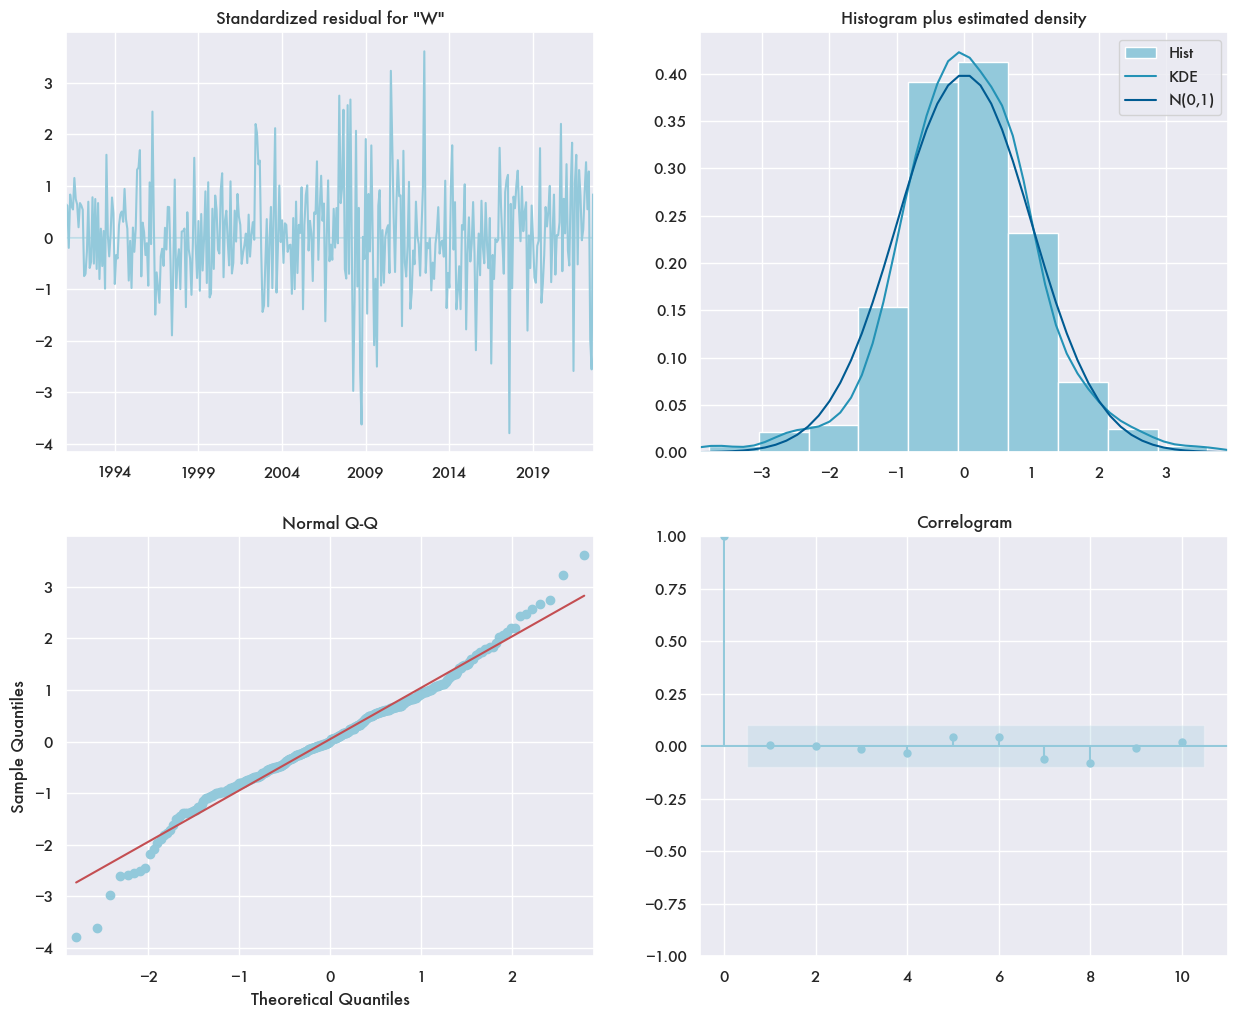

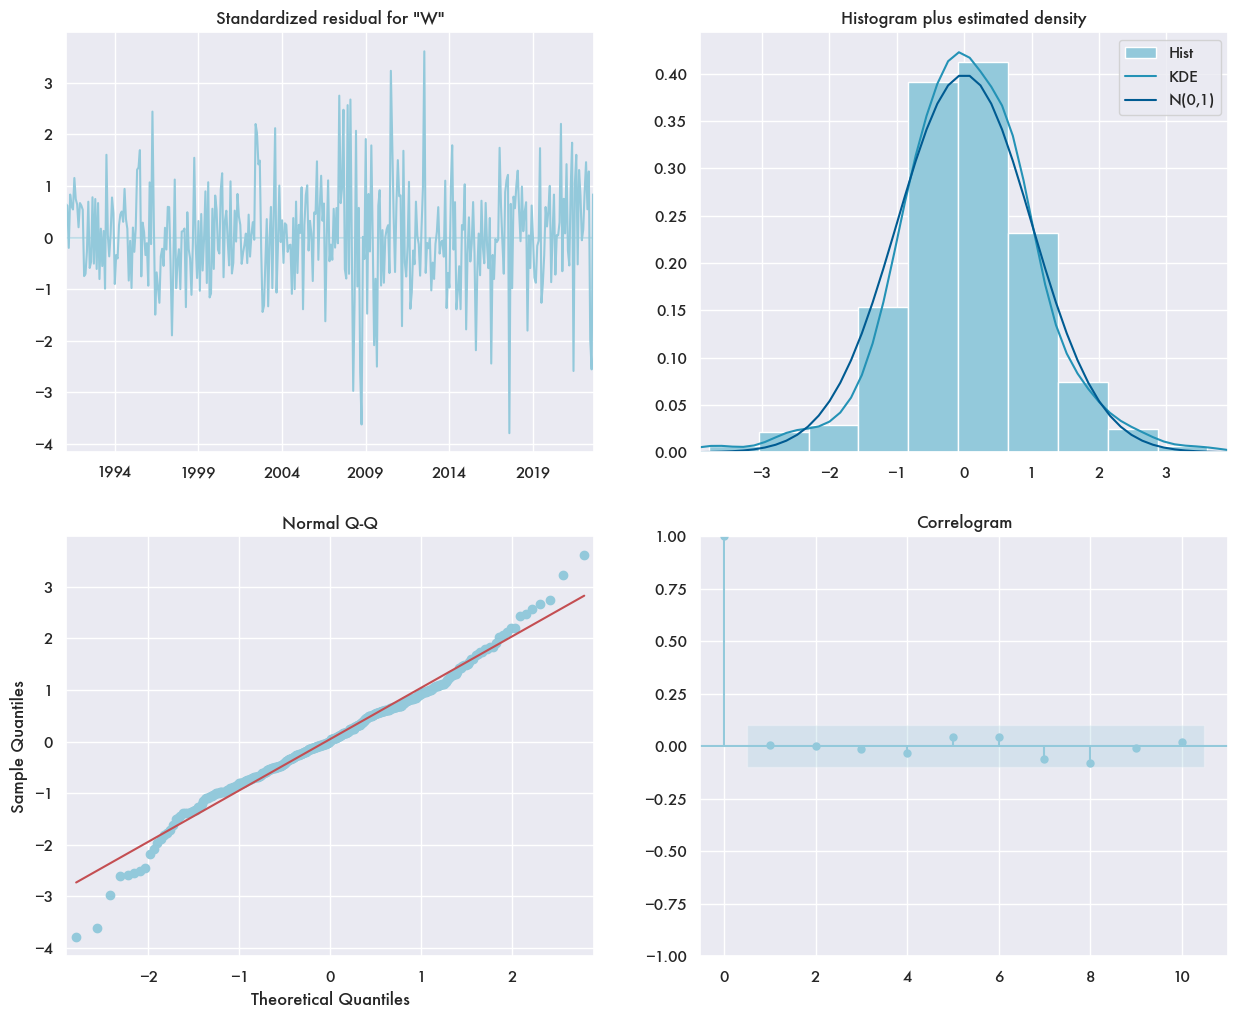

In [94]:
model_final.plot_diagnostics(figsize=(15,12))

In [95]:
#Forecasting 10 years ahead
forecast_values = model_final.get_forecast(steps = 50)

#Confidence intervals of the forecasted values
forecast_ci = forecast_values.conf_int()

#Plot the data
ax = sns.lineplot(x= df_wheat.index, y=df_wheat.values)

#Plot the forecasted values 
forecast_values.predicted_mean.plot(ax=ax, label='Forecast')

#Plot the confidence intervals
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[: , 0],
                forecast_ci.iloc[: , 1], color='yellow', alpha = .5)
# plt.title('Electricity Net Generation From Coal, Electric Power Sector, Monthly', size = 16)
# plt.ylabel('KWh', size=12)
# plt.legend(loc='upper left', prop={'size': 12})
# ax.axes.get_xaxis().set_visible(True)
# #annotation
# ax.text(540, 400, 'Forecasted Values Until 2030', fontsize=12,  color='red')


ValueError: Per-column arrays must each be 1-dimensional